In [24]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [25]:
def tanh(x):
    return (1.0 - np.exp(-2*x)) / (1.0 + np.exp(-2*x))

In [26]:
def tanh_derivative(x):
    return (1 + tanh(x)) * (1 - tanh(x))

In [27]:
class NeuralNetwork:
    #network consists of a list of integers, indicating 
    #the number of neurons in each layer
    def __init__(self, net_arch): 
        np.random.seed(0)                  
        self.activity = tanh         
        self.activity_derivative = tanh_derivative 
        self.layers = len(net_arch)         
        self.steps_per_epoch = 1000
        self.arch = net_arch        

        self.weights = []         
        #range of weight values (-1,1)         
        for layer in range(len(net_arch) - 1):             
            w = 2*np.random.rand(net_arch[layer] + 1, net_arch[layer+1]) - 1           
            self.weights.append(w)

    def fit(self, data, labels, learning_rate=0.1, epochs=10):         
        #Add bias units to the input layer         
        ones = np.ones((1, data.shape[0]))        
        Z = np.concatenate((ones.T, data), axis=1)
        training = epochs*self.steps_per_epoch


        for k in range(training):             
            if k % self.steps_per_epoch == 0:                  
                #print ('epochs:', k/self.steps_per_epoch)    
                print('epochs: {}'.format(k/self.steps_per_epoch))              
                for s in data:                     
                    print(s, nn.predict(s))

            sample = np.random.randint(data.shape[0])            
            y = [Z[sample]] 

            for i in range(len(self.weights)-1):                     
                activation = np.dot(y[i], self.weights[i])                         
                activity = self.activity(activation)  
                #add the bias for the next layer                     
                activity = np.concatenate((np.ones(1), np.array(activity)))                      
                y.append(activity)   
             
            #last layer              
            activation = np.dot(y[-1], self.weights[-1])             
            activity = self.activity(activation)             
            y.append(activity)
                    
            #error for the output layer             
            error = labels[sample] - y[-1]             
            delta_vec = [error * self.activity_derivative(y[-1])] 

            #we need to begin from the back from the next to last layer
            for i in range(self.layers-2, 0, -1):  
                #delta_vec [1].dot(self.weights[i][1:].T)                
                error = delta_vec[-1].dot(self.weights[i][1:].T) 
                error = error*self.activity_derivative(y[i][1:])               
                delta_vec.append(error)

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            delta_vec.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight
            for i in range(len(self.weights)):
                layer = y[i].reshape(1, nn.arch[i]+1) 
 
                delta = delta_vec[i].reshape(1, nn.arch[i+1])
                self.weights[i] += learning_rate * layer.T.dot(delta)

    def predict(self, x): 
        val = np.concatenate((np.ones(1).T, np.array(x)))      
        for i in range(0, len(self.weights)):
            val = self.activity(np.dot(val, self.weights[i]))
            val = np.concatenate((np.ones(1).T, np.array(val)))
            
        return val[1]
    
    def plot_decision_regions(self, X, y, points=200):
        markers = ('o', '^')
        colors = ('red', 'blue')
        cmap = ListedColormap(colors)
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        
        resolution = max(x1_max - x1_min, x2_max - x2_min)/float(points)
        #resolution = 0.01
     
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
        input = np.array([xx1.ravel(), xx2.ravel()]).T 
        Z = np.empty(0)
        for i in range(input.shape[0]):
            val = nn.predict(np.array(input[i]))
            if val < 0.5: val = 0 
            if val >= 0.5: val = 1
            Z = np.append(Z, val)

        Z = Z.reshape(xx1.shape)
        
        plt.pcolormesh(xx1, xx2, Z, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
        # plot all samples

        classes = ["False", "True"]
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=1.0, c=cmap(idx), marker=markers[idx], s=80, label=classes[idx])
            
        plt.xlabel('x-axis')            
        plt.ylabel('y-axis')
        plt.legend(loc='upper left')
        plt.show()    

epochs: 0.0
[0 0] 0.31634987228520156
[0 1] 0.38455314510086014
[1 0] 0.49960366414001517
[1 1] 0.5470092417007291
epochs: 1.0
[0 0] 0.10110562119575028
[0 1] 0.4983062530300435
[1 0] 0.5483740117095983
[1 1] 0.635812878112665
epochs: 2.0
[0 0] 0.07164948329787507
[0 1] 0.861075813281495
[1 0] 0.8502850626450226
[1 1] 0.07158530421971575
epochs: 3.0
[0 0] 0.017586567899253898
[0 1] 0.9666637734019891
[1 0] 0.9651222166853127
[1 1] 0.011468668342141863
epochs: 4.0
[0 0] -0.0017118993569209561
[0 1] 0.9815292663780985
[1 0] 0.9828812324283912
[1 1] -0.00030370918696389856
epochs: 5.0
[0 0] 0.0026985374081322524
[0 1] 0.9885083594808965
[1 0] 0.9891298042443863
[1 1] 0.015552778145750895
epochs: 6.0
[0 0] 0.005625211435814411
[0 1] 0.9922099656276941
[1 0] 0.9915443580479176
[1 1] 0.01694332658239157
epochs: 7.0
[0 0] 0.0019544398675395446
[0 1] 0.9934850143000605
[1 0] 0.9934672674082785
[1 1] 0.0007886110283738284
epochs: 8.0
[0 0] 0.0036493566842653565
[0 1] 0.9950489745378326
[1 0] 0.

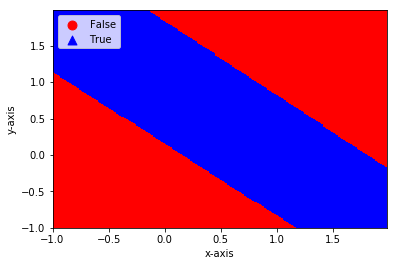

In [28]:
if __name__ == '__main__':
    np.random.seed(0)
    #Initialize the NeuralNetwork with
    #2 input neurons
    #2 hidden neurons
    #1 output reuron 
    nn = NeuralNetwork([2, 2, 1])
    X = np.array([[0, 0], 
                 [0, 1],
                 [1, 0],
                 [1, 1]])
    #Set the labels, the correct result for the xor operation
    y = np.array([0, 1, 1, 0])
    
    #Call the fit function and train the network
    #for a chosen number of epochs
    nn.fit(X, y, epochs=10)
    print('Final prediction')
    for s in X:
        print(s, nn.predict(s))
    nn.plot_decision_regions(X, y)

epochs: 0.0
[0 0] 0.7302882745734867
[0 1] 0.6603984586641648
[1 0] 0.7765150107682696
[1 1] 0.6876822979199608
epochs: 1.0
[0 0] 0.024202625510632528
[0 1] 0.9536339110772841
[1 0] 0.9551560371784703
[1 1] -0.024109160886660177
epochs: 2.0
[0 0] -0.0005288282270472422
[0 1] 0.9884261590984321
[1 0] 0.9769897002192095
[1 1] 0.004908869317806093
epochs: 3.0
[0 0] -0.009095958760654718
[0 1] 0.9921198665867749
[1 0] 0.9867664286696224
[1 1] -0.00793135199518263
epochs: 4.0
[0 0] -0.041254681463367054
[0 1] 0.9943426850453582
[1 0] 0.991035829417014
[1 1] -0.05184659972290272
epochs: 5.0
[0 0] 0.0006154563014629689
[0 1] 0.9961187930272107
[1 0] 0.9933166966664496
[1 1] 0.0005879270300111804
epochs: 6.0
[0 0] -0.025748543641834026
[0 1] 0.9976853050761919
[1 0] 0.994738491829456
[1 1] 0.02732779073739307
epochs: 7.0
[0 0] -0.006779296198781339
[0 1] 0.997525383569398
[1 0] 0.9956695516570512
[1 1] -0.04808140343930454
epochs: 8.0
[0 0] 0.002497972555302605
[0 1] 0.9984264750040437
[1 0] 0

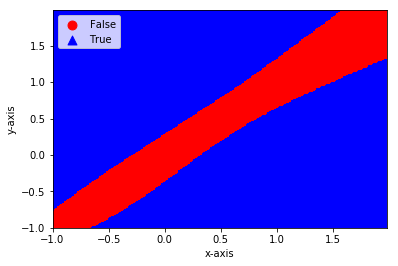

In [29]:
if __name__ == '__main__':
    np.random.seed(0)
    #Initialize the NeuralNetwork with
    #2 input neurons
    #2 hidden neurons
    #1 output reuron 
    nn = NeuralNetwork([2, 4, 3, 1])
    X = np.array([[0, 0], 
                 [0, 1],
                 [1, 0],
                 [1, 1]])
    #Set the labels, the correct result for the xor operation
    y = np.array([0, 1, 1, 0])
    
    #Call the fit function and train the network
    #for a chosen number of epochs
    nn.fit(X, y, epochs=10)
    print('Final prediction')
    for s in X:
        print(s, nn.predict(s))
    nn.plot_decision_regions(X, y)

epochs: 0.0
[0 0] -0.36474682713915346
[0 1] -0.0576734234293377
[1 0] -0.8281644270973577
[1 1] -0.6838789537658782
epochs: 1.0
[0 0] 0.0012264461281856684
[0 1] 0.8963469716115047
[1 0] 0.934924873565157
[1 1] 0.08898179147818247
epochs: 2.0
[0 0] 0.0002961580910029421
[0 1] 0.9688827198571784
[1 0] 0.9662503831602489
[1 1] 0.008644872588482162
epochs: 3.0
[0 0] 0.0071159338684977725
[0 1] 0.9813731737141141
[1 0] 0.9822526383862823
[1 1] 0.006005154878248693
epochs: 4.0
[0 0] 0.006848500603729853
[0 1] 0.9864046085009018
[1 0] 0.9885690101916605
[1 1] 0.003064289971788446
epochs: 5.0
[0 0] -0.008857971625932331
[0 1] 0.9897485009925207
[1 0] 0.9911835556638969
[1 1] 0.003294623028215667
epochs: 6.0
[0 0] 0.03579104739273827
[0 1] 0.9927380831722351
[1 0] 0.9924438695351931
[1 1] 0.02089126740660053
epochs: 7.0
[0 0] -0.0007758481901961406
[0 1] 0.9933685646353988
[1 0] 0.9938500371045097
[1 1] -0.0045018964315353465
epochs: 8.0
[0 0] 0.0011549112254197525
[0 1] 0.9948566363899829
[1

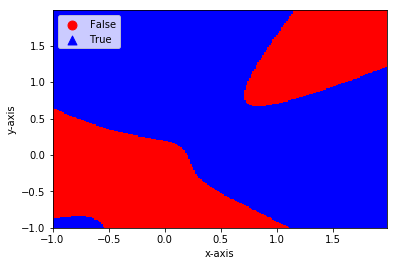

In [30]:
if __name__ == '__main__':
    np.random.seed(0)
    #Initialize the NeuralNetwork with
    #2 input neurons
    #2 hidden neurons
    #1 output reuron 
    nn = NeuralNetwork([2, 4, 1])
    X = np.array([[0, 0], 
                 [0, 1],
                 [1, 0],
                 [1, 1]])
    #Set the labels, the correct result for the xor operation
    y = np.array([0, 1, 1, 0])
    
    #Call the fit function and train the network
    #for a chosen number of epochs
    nn.fit(X, y, epochs=10)
    print('Final prediction')
    for s in X:
        print(s, nn.predict(s))
    nn.plot_decision_regions(X, y)